<a href="https://colab.research.google.com/github/sethli2003/churn-modelling/blob/main/churn_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 83.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.4/763.4 kB 53.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 8.

In [ ]:

!pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 3.3 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce

In [ ]:

import pandas as pd
import numpy as np
from scipy import stats
import os
import sys
import time
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from dataprep.eda import create_report, plot, plot_correlation, plot_missing , plot_diff
from sklearn.manifold import TSNE
from scipy.stats import trim_mean
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import h5py
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#import encoders as ce

In [ ]:
data =pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Churn_Modelling.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
print("No.of columns and rows\n{} rows and {} columns".format(data.shape[0], data.shape[1]))

No.of columns and rows
10000 rows and 14 columns


In [ ]:
print(data.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [ ]:
data.head(10)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H?          684    France    Male   27   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   
5       8  113755.78              2          1               0   
6       7       0.00              2          1               1   
7       4  115046.74              4          1               0   
8       4  142051.07              2          0               1   
9       2  134603.88              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0  
5        149756.71       1  
6         10062.80       0  
7        119346.88       1  
8         74940.50       0  
9         71725.73       0

In [ ]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
print("Number of numerical columns: {}".format(data.select_dtypes(include=np.number).shape[1]))
print("Number of non-numerical columns: {}".format(data.select_dtypes(exclude=np.number).shape[1]))

Number of numerical columns: 11
Number of non-numerical columns: 3


In [ ]:
data.loc[data["Gender"] == "Male", "Gender"] = "0"
data.loc[data["Gender"] == "Female", "Gender"] = "1"
print("Convert male gender to 0 and female gender to 1")

Convert male gender to 0 and female gender to 1


In [ ]:
encoder = ce.TargetEncoder(cols=["Geography", "Surname"], smoothing=0.2)

In [ ]:
data = encoder.fit_transform(data, data["Exited"])

In [ ]:
data = data.drop(["Surname", "RowNumber", "CustomerId"], axis=1)
print("Dropping the 'Surname' column, the 'RowNumber' column and the 'CustomerId' column")

Dropping the 'Surname' column, the 'RowNumber' column and the 'CustomerId' column


In [ ]:
data = data.apply(pd.to_numeric)
print("Converting all the values to numerics")

Converting all the values to numerics


In [ ]:
print("Number of numerical columns: {}".format(data.select_dtypes(include=np.number).shape[1]))
print("Number of non-numerical columns: {}".format(data.select_dtypes(exclude=np.number).shape[1]))

Number of numerical columns: 11
Number of non-numerical columns: 0


In [ ]:
data.head(10)

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619   0.161548       1   42       2       0.00              1   
1          608   0.166734       1   41       1   83807.86              1   
2          502   0.161548       1   42       8  159660.80              3   
3          699   0.161548       1   39       1       0.00              2   
4          850   0.166734       1   43       2  125510.82              1   
5          645   0.166734       0   44       8  113755.78              2   
6          822   0.161548       0   50       7       0.00              2   
7          376   0.324432       1   29       4  115046.74              4   
8          501   0.161548       0   44       4  142051.07              2   
9          684   0.161548       0   27       2  134603.88              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  
5          1               0        149756.71       1  
6          1               1         10062.80       0  
7          1               0        119346.88       1  
8          0               1         74940.50       0  
9          1               1         71725.73       0

In [ ]:
print("Total missing values is {}".format(data.isnull().sum().sum()))

Total missing values is 0


In [ ]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
data= data.apply(pd.to_numeric, errors='coerce')

In [ ]:
data = data.apply(lambda x: x.fillna(trim_mean(x, 0.1)), axis=0)

In [ ]:
print("Total missing values is {}".format(data.isnull().sum().sum()))
data.isnull().sum()

Total missing values is 0


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

The plot will not show in a notebook environment, please try 'show_browser' if you want to open it in browser



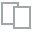
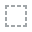
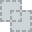
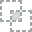
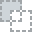
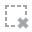
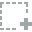
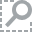
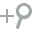
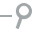
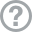
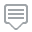
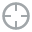
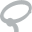
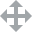
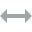
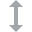
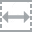
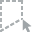
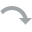
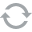
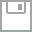
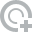
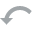
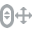
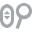
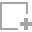
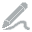
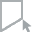
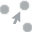
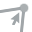
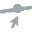

In [ ]:
report = create_report(data)
report.show()

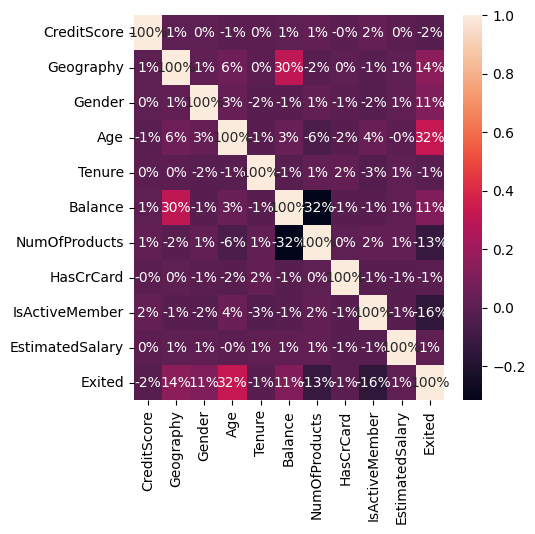

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(method='spearman'), annot=True, fmt='.0%')
plt.show()

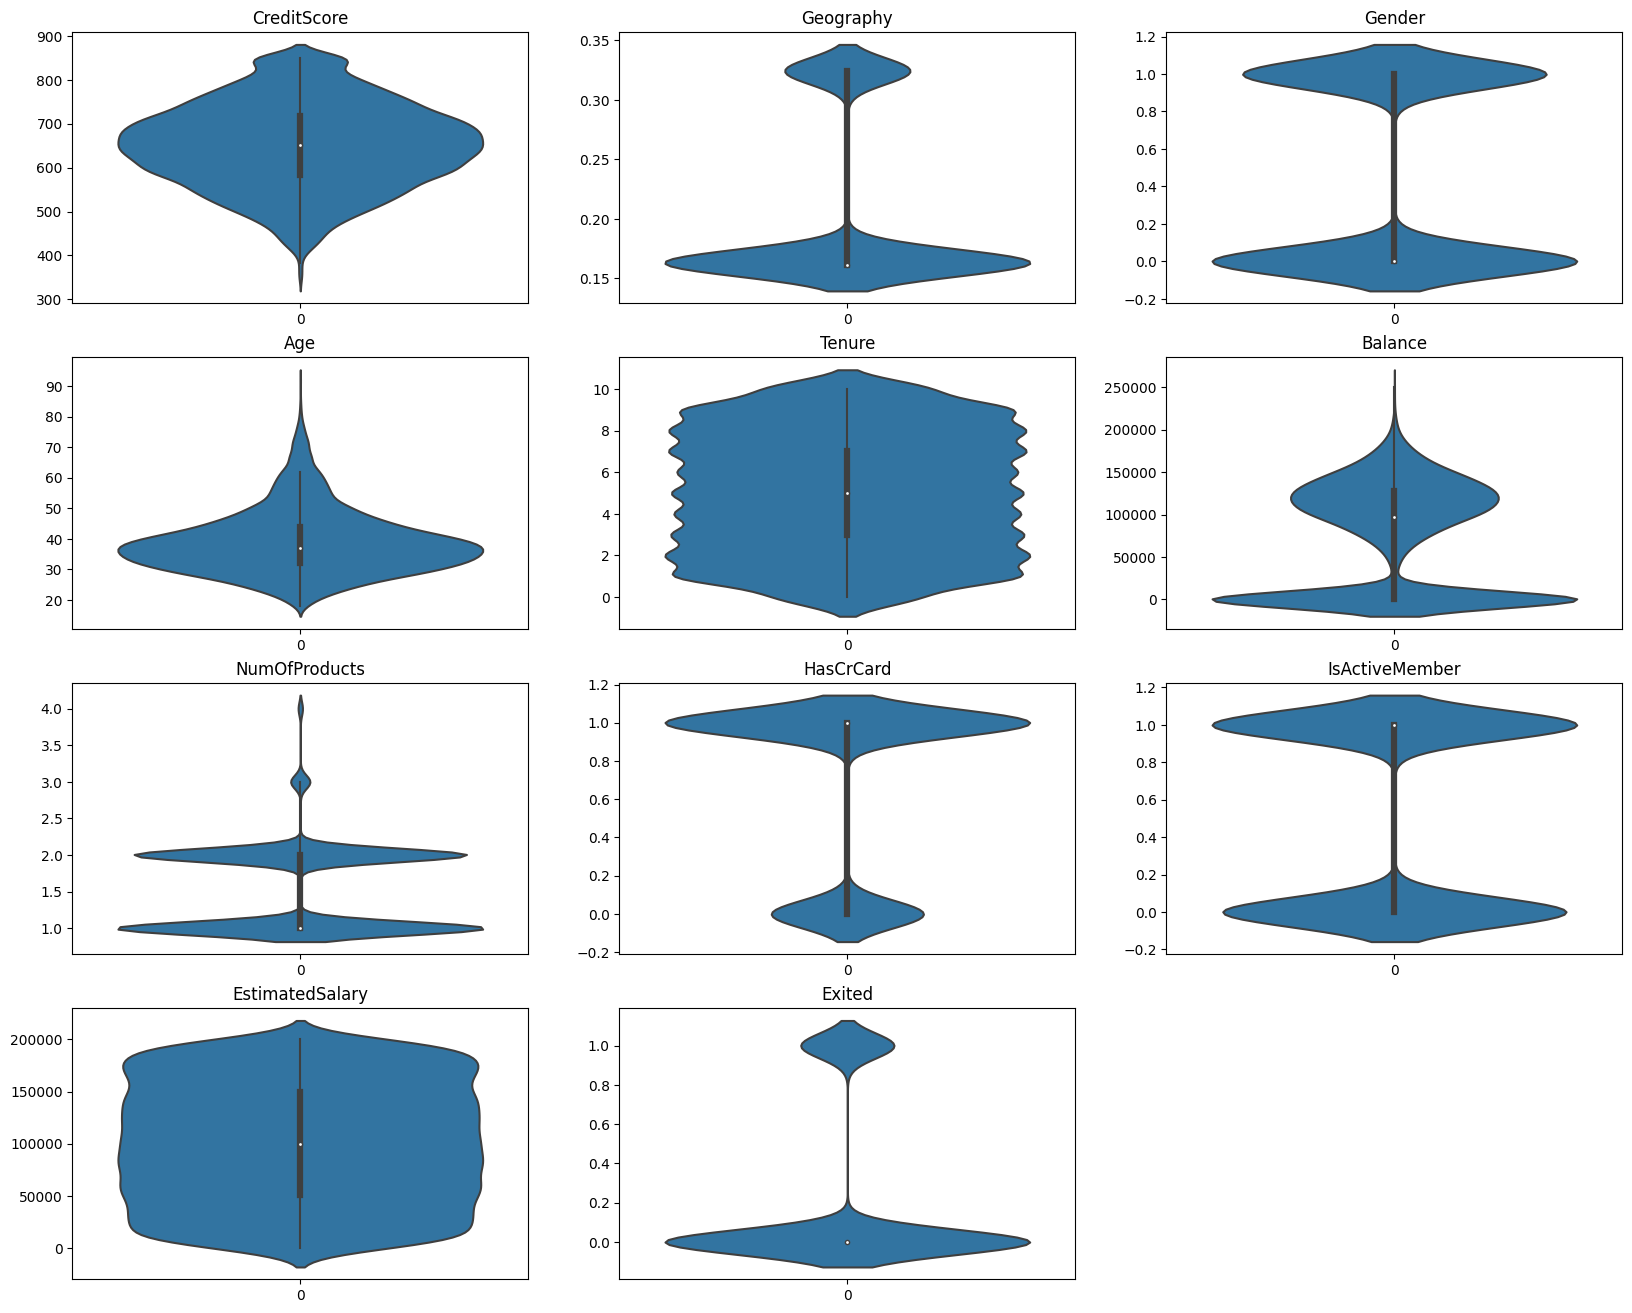

In [ ]:
plt.figure(figsize=(20, 50))
for i, column in enumerate(data.columns):
    plt.subplot(12, 3, i+1)
    sns.violinplot(data[column])
    plt.title(column)
plt.show()

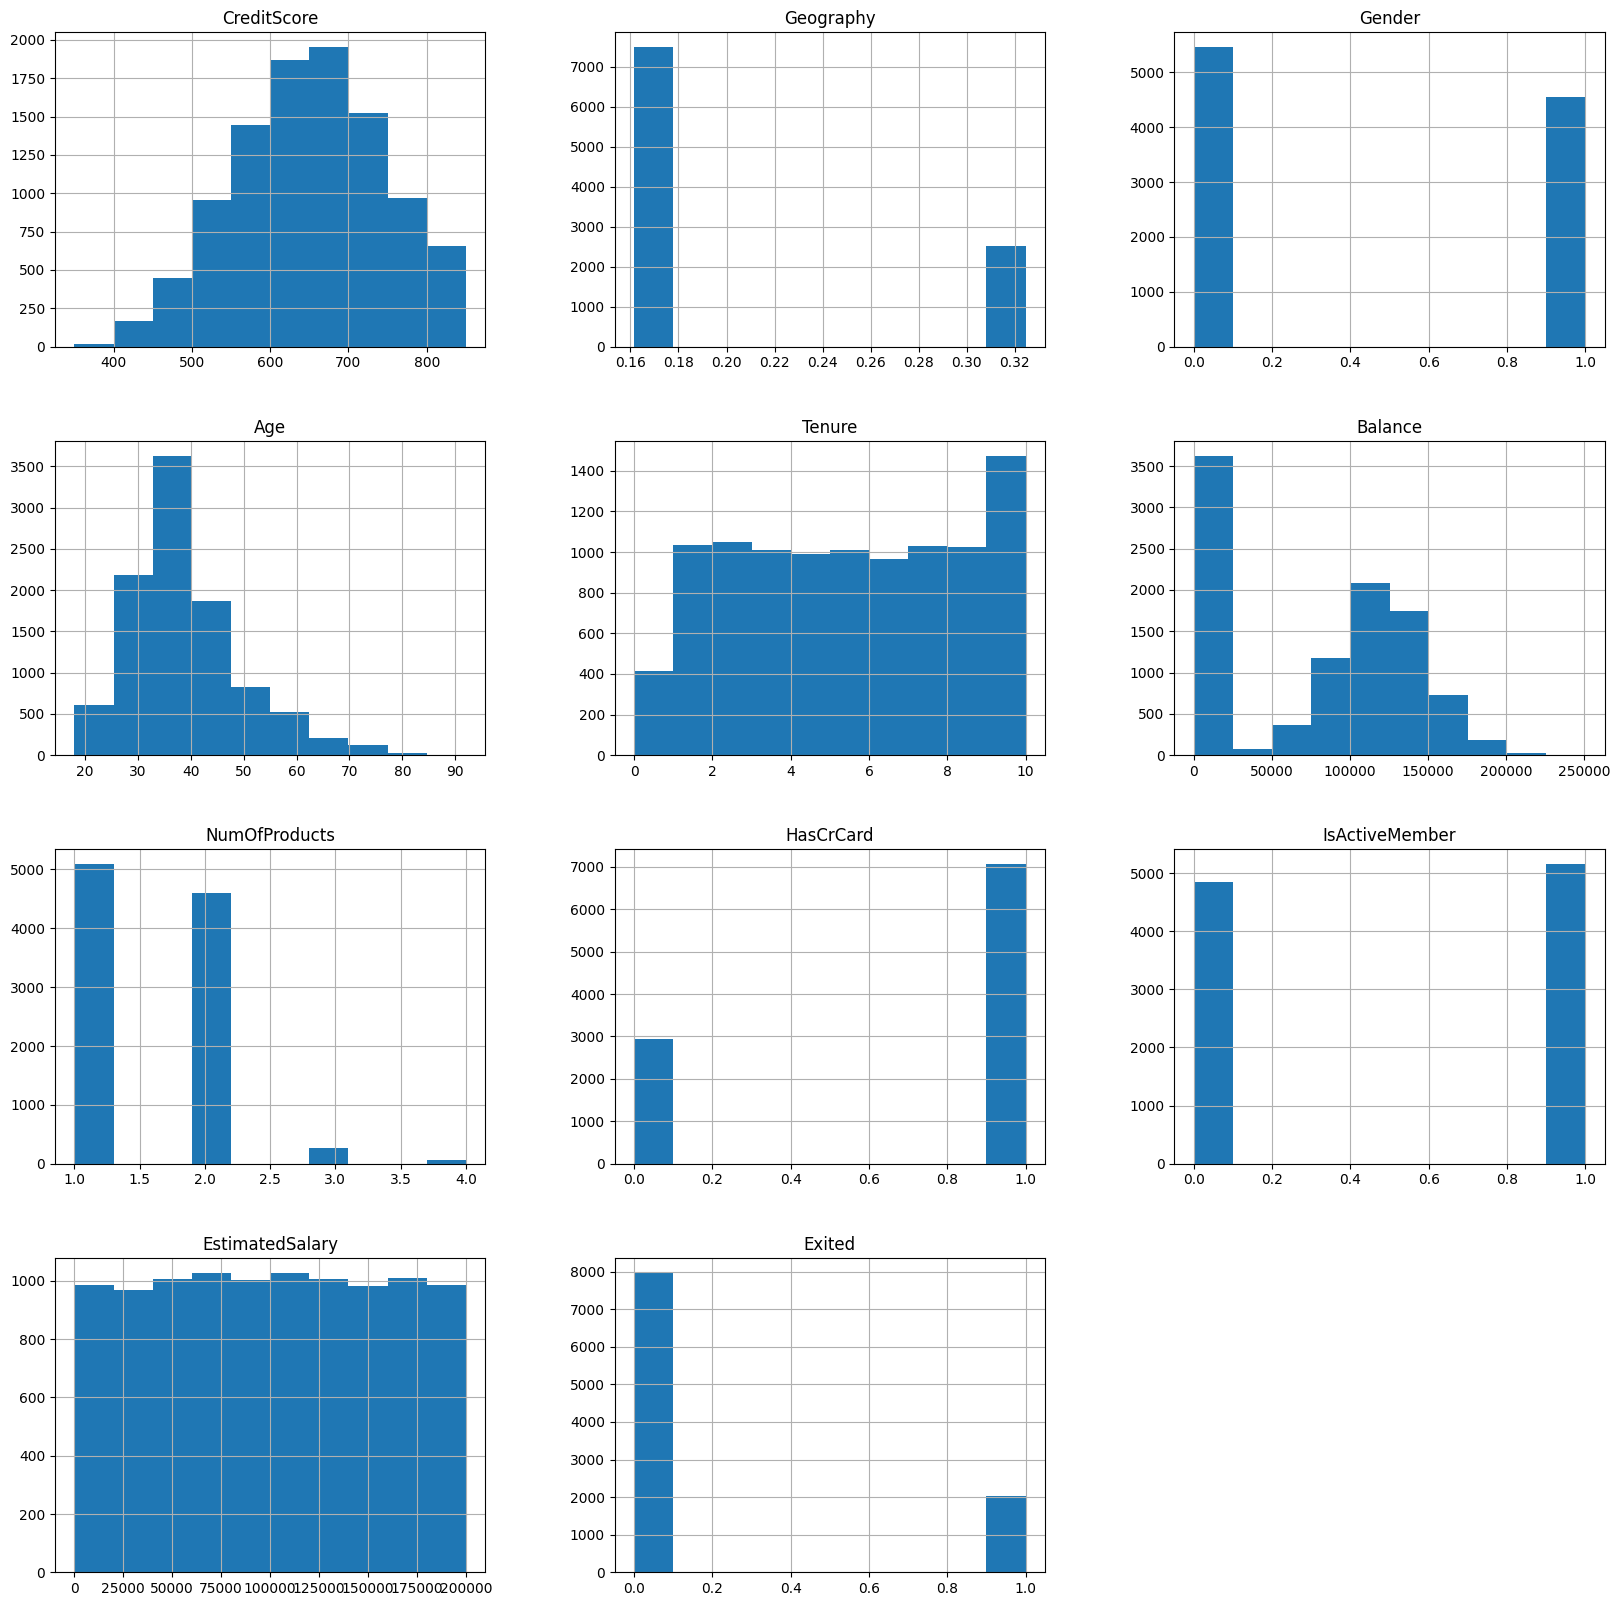

In [ ]:
data.hist(figsize=(20, 20))
plt.show()

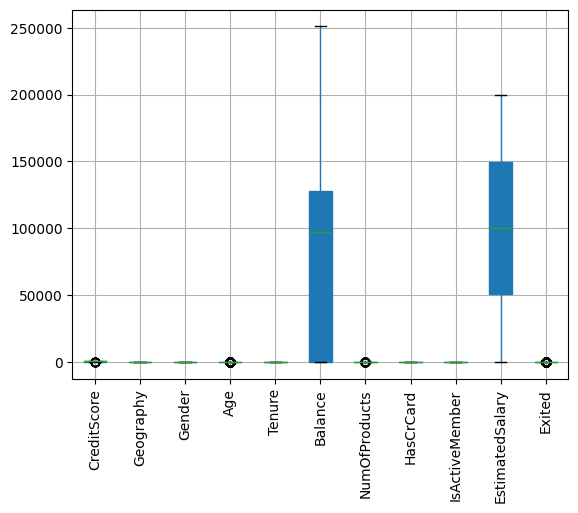

In [ ]:
bplot = data.boxplot(patch_artist=True)
plt.xticks(rotation=90)       
plt.show()

In [ ]:
data=pd.get_dummies(data,columns=['Gender','Geography','NumOfProducts'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CreditScore                    10000 non-null  int64  
 1   Age                            10000 non-null  int64  
 2   Tenure                         10000 non-null  int64  
 3   Balance                        10000 non-null  float64
 4   HasCrCard                      10000 non-null  int64  
 5   IsActiveMember                 10000 non-null  int64  
 6   EstimatedSalary                10000 non-null  float64
 7   Exited                         10000 non-null  int64  
 8   Gender_0                       10000 non-null  uint8  
 9   Gender_1                       10000 non-null  uint8  
 10  Geography_0.16154766653370561  10000 non-null  uint8  
 11  Geography_0.1667339523617279   10000 non-null  uint8  
 12  Geography_0.32443204463929853  10000 non-null  

In [ ]:
age_category=[0 if i < 38.92  else  1 if i < 50  else 2 if i < 60 else 4 for i in data['Age']]
data['AgeCategory']=age_category
data.drop(labels='Age', axis=1,inplace=True)

In [ ]:
data['AgeCategory']=data['AgeCategory'].astype('category')

In [ ]:
data=pd.get_dummies(data,columns=['AgeCategory'])
data.head()

CreditScore  Tenure    Balance  HasCrCard  IsActiveMember  EstimatedSalary  \
0          619       2       0.00          1               1        101348.88   
1          608       1   83807.86          0               1        112542.58   
2          502       8  159660.80          1               0        113931.57   
3          699       1       0.00          0               0         93826.63   
4          850       2  125510.82          1               1         79084.10   

   Exited  Gender_0  Gender_1  Geography_0.16154766653370561  \
0       1         0         1                              1   
1       0         0         1                              0   
2       1         0         1                              1   
3       0         0         1                              1   
4       0         0         1                              0   

   Geography_0.1667339523617279  Geography_0.32443204463929853  \
0                             0                              0   
1                             1                              0   
2                             0                              0   
3                             0                              0   
4                             1                              0   

   NumOfProducts_1  NumOfProducts_2  NumOfProducts_3  NumOfProducts_4  \
0                1                0                0                0   
1                1                0                0                0   
2                0                0                1                0   
3                0                1                0                0   
4                1                0                0                0   

   AgeCategory_0  AgeCategory_1  AgeCategory_2  AgeCategory_4  
0              0              1              0              0  
1              0              1              0              0  
2              0              1              0              0  
3              0              1              0              0  
4              0              1              0              0

In [ ]:
print('Max Age', data['CreditScore'].max())
print('Min Age',data['CreditScore'].min())
print('Mean Age',data['CreditScore'].mean())
credit_category=[0 if i < 450  else  1 if i < 600  else 2 if i < 700 else 4 for i in data['CreditScore']]
data['CreditScoreCategory']=credit_category

Max Age 850
Min Age 350
Mean Age 650.5288


In [ ]:
data['CreditScoreCategory']=data['CreditScoreCategory'].astype('category')
data=pd.get_dummies(data,columns=['CreditScoreCategory'])
data.drop(labels='CreditScore', axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Tenure                         10000 non-null  int64  
 1   Balance                        10000 non-null  float64
 2   HasCrCard                      10000 non-null  int64  
 3   IsActiveMember                 10000 non-null  int64  
 4   EstimatedSalary                10000 non-null  float64
 5   Exited                         10000 non-null  int64  
 6   Gender_0                       10000 non-null  uint8  
 7   Gender_1                       10000 non-null  uint8  
 8   Geography_0.16154766653370561  10000 non-null  uint8  
 9   Geography_0.1667339523617279   10000 non-null  uint8  
 10  Geography_0.32443204463929853  10000 non-null  uint8  
 11  NumOfProducts_1                10000 non-null  uint8  
 12  NumOfProducts_2                10000 non-null  

In [ ]:
X = data.drop(["Exited"],axis=1)
y = data["Exited"].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns.values)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns.values)

In [ ]:
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (7500, 22)
x test:  (2500, 22)
y train:  (7500,)
y test:  (2500,)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model =keras.Sequential([
layers.Dense(10,activation='relu',input_dim=X_train.shape[1]),
layers.Dense(10,activation='relu'),
layers.Dense(10,activation='relu'),
layers.Dense(10,activation='relu'),
layers.Dense(10,activation='relu'),
layers.Dense(1,activation='sigmoid')
])
model.compile(
	loss=keras.losses.BinaryCrossentropy(from_logits=False),
	optimizer=keras.optimizers.Adam(learning_rate=0.001),
	metrics=['accuracy']
	)

model.fit(X_train, y_train,batch_size=128 ,epochs=600,verbose=1)

Epoch 1/600
59/59 [==============================] - 2s 3ms/step - loss: 0.5876 - accuracy: 0.7672
Epoch 2/600
59/59 [==============================] - 0s 3ms/step - loss: 0.4598 - accuracy: 0.7953
Epoch 3/600
59/59 [==============================] - 0s 4ms/step - loss: 0.4167 - accuracy: 0.7967
Epoch 4/600
59/59 [==============================] - 0s 3ms/step - loss: 0.3919 - accuracy: 0.8247
Epoch 5/600
59/59 [==============================] - 0s 3ms/step - loss: 0.3758 - accuracy: 0.8451
Epoch 6/600
59/59 [==============================] - 0s 3ms/step - loss: 0.3660 - accuracy: 0.8496
Epoch 7/600
59/59 [==============================] - 0s 3ms/step - loss: 0.3609 - accuracy: 0.8500
Epoch 8/600
59/59 [==============================] - 0s 3ms/step - loss: 0.3572 - accuracy: 0.8533
Epoch 9/600
59/59 [==============================] - 0s 3ms/step - loss: 0.3544 - accuracy: 0.8559
Epoch 10/600
59/59 [==============================] - 0s 2ms/step - loss: 0.3527 - accuracy: 0.8561
Epoch 11/

In [ ]:
model.evaluate(X_test,y_test,batch_size=128,verbose=1)

20/20 [==============================] - 0s 2ms/step - loss: 0.4561 - accuracy: 0.8372


[0.45606285333633423, 0.8371999859809875]

In [ ]:
ypred = model.predict(X_train)
score, acc = model.evaluate(X_train, y_train,batch_size=128)
print('Train score:', score)
print('Train accuracy:', acc*100)

59/59 [==============================] - 0s 2ms/step - loss: 0.2947 - accuracy: 0.8813
Train score: 0.2946600914001465
Train accuracy: 88.13333511352539


In [ ]:
ypred = model.predict(X_test)
score, acc = model.evaluate(X_test, y_test,batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc*100)

250/250 [==============================] - 0s 2ms/step - loss: 0.4561 - accuracy: 0.8372
Test score: 0.4560627341270447
Test accuracy: 83.71999859809875
